**Sales Prediction using Python**

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.dtypes

,0
Unnamed: 0,int64
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


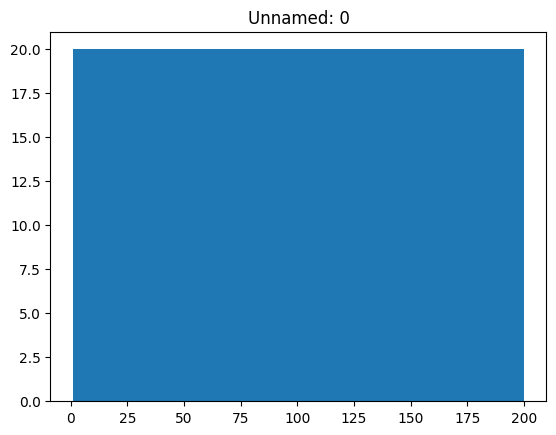

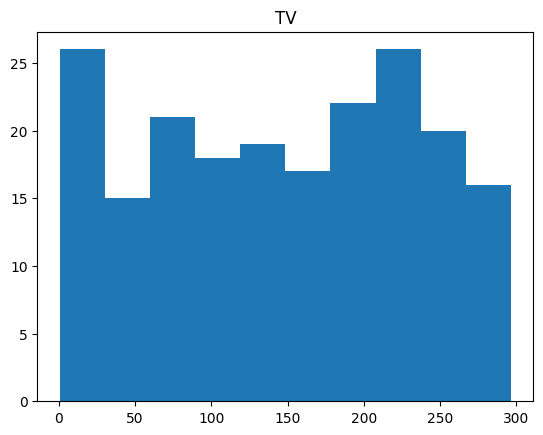

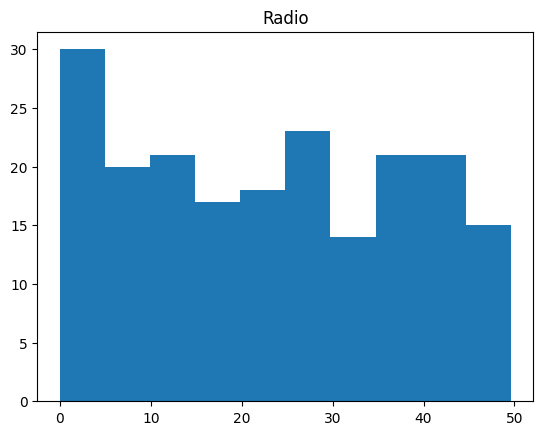

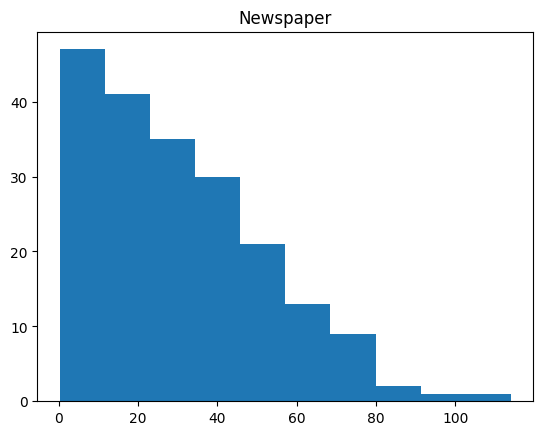

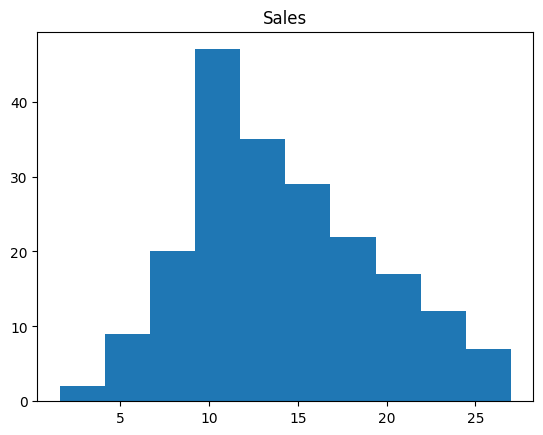

In [15]:
# histogram for each columns

import matplotlib.pyplot as plt
for column in df.columns:
  plt.hist(df[column])
  plt.title(column)
  plt.show()


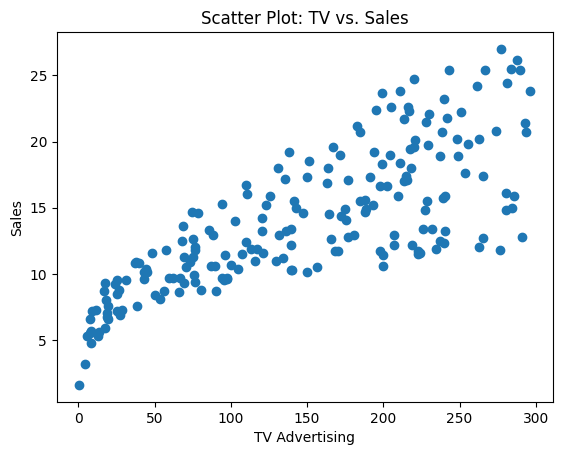

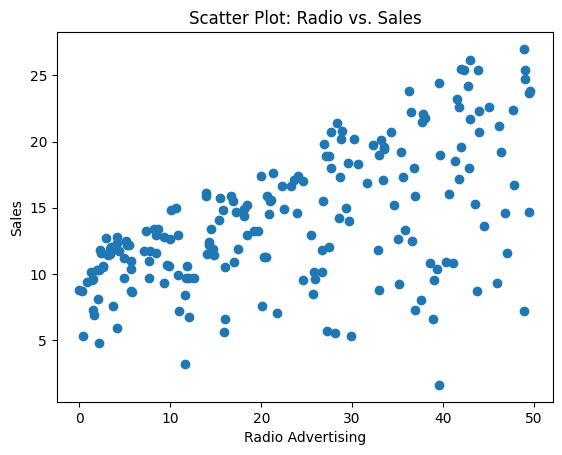

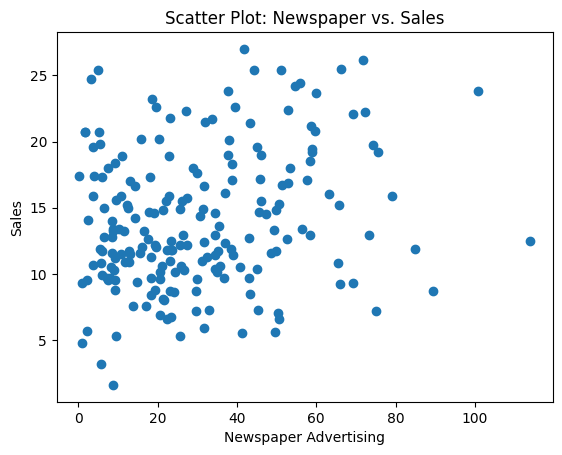

In [16]:
# prompt: make scatter plot

import matplotlib.pyplot as plt
# Scatter plot for TV vs. Sales
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Scatter Plot: TV vs. Sales')
plt.show()

# Scatter plot for Radio vs. Sales
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.title('Scatter Plot: Radio vs. Sales')
plt.show()

# Scatter plot for Newspaper vs. Sales
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.title('Scatter Plot: Newspaper vs. Sales')
plt.show()


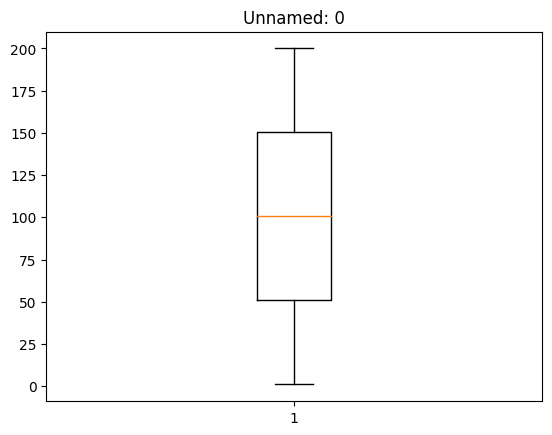

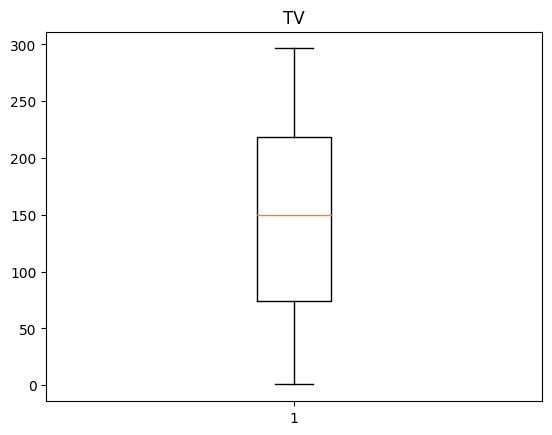

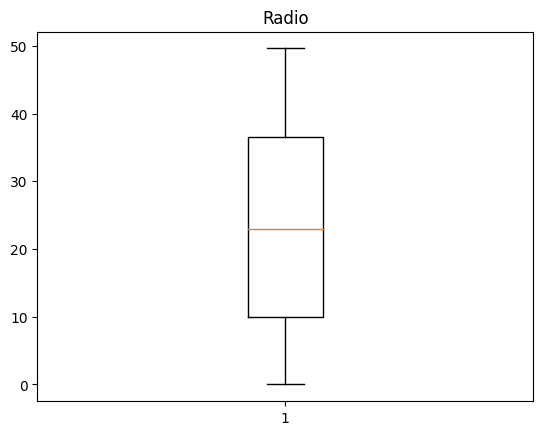

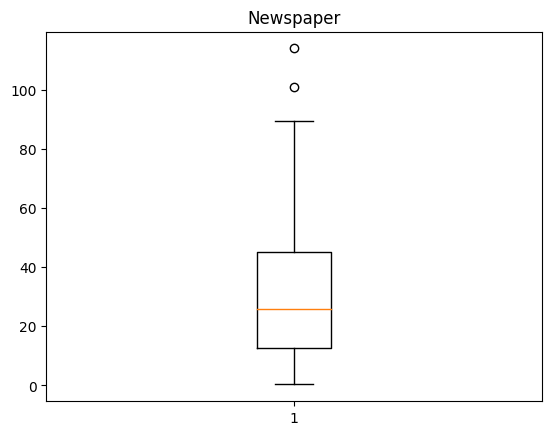

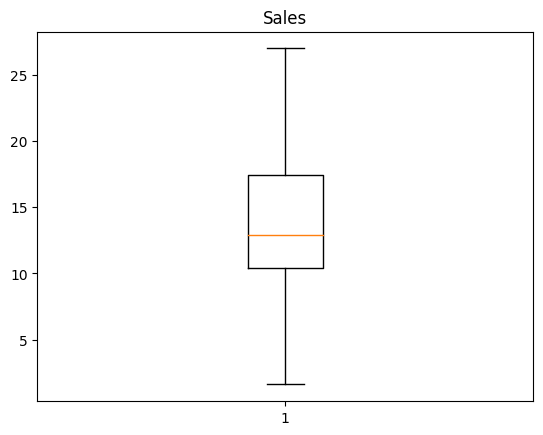

In [17]:
# prompt: make boxplot

import matplotlib.pyplot as plt
# Box plot for each column
for column in df.columns:
  plt.boxplot(df[column])
  plt.title(column)
  plt.show()


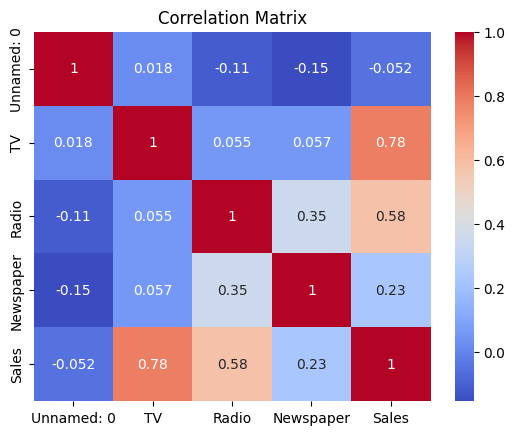

In [20]:
# corelatiom matrix

import matplotlib.pyplot as plt
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

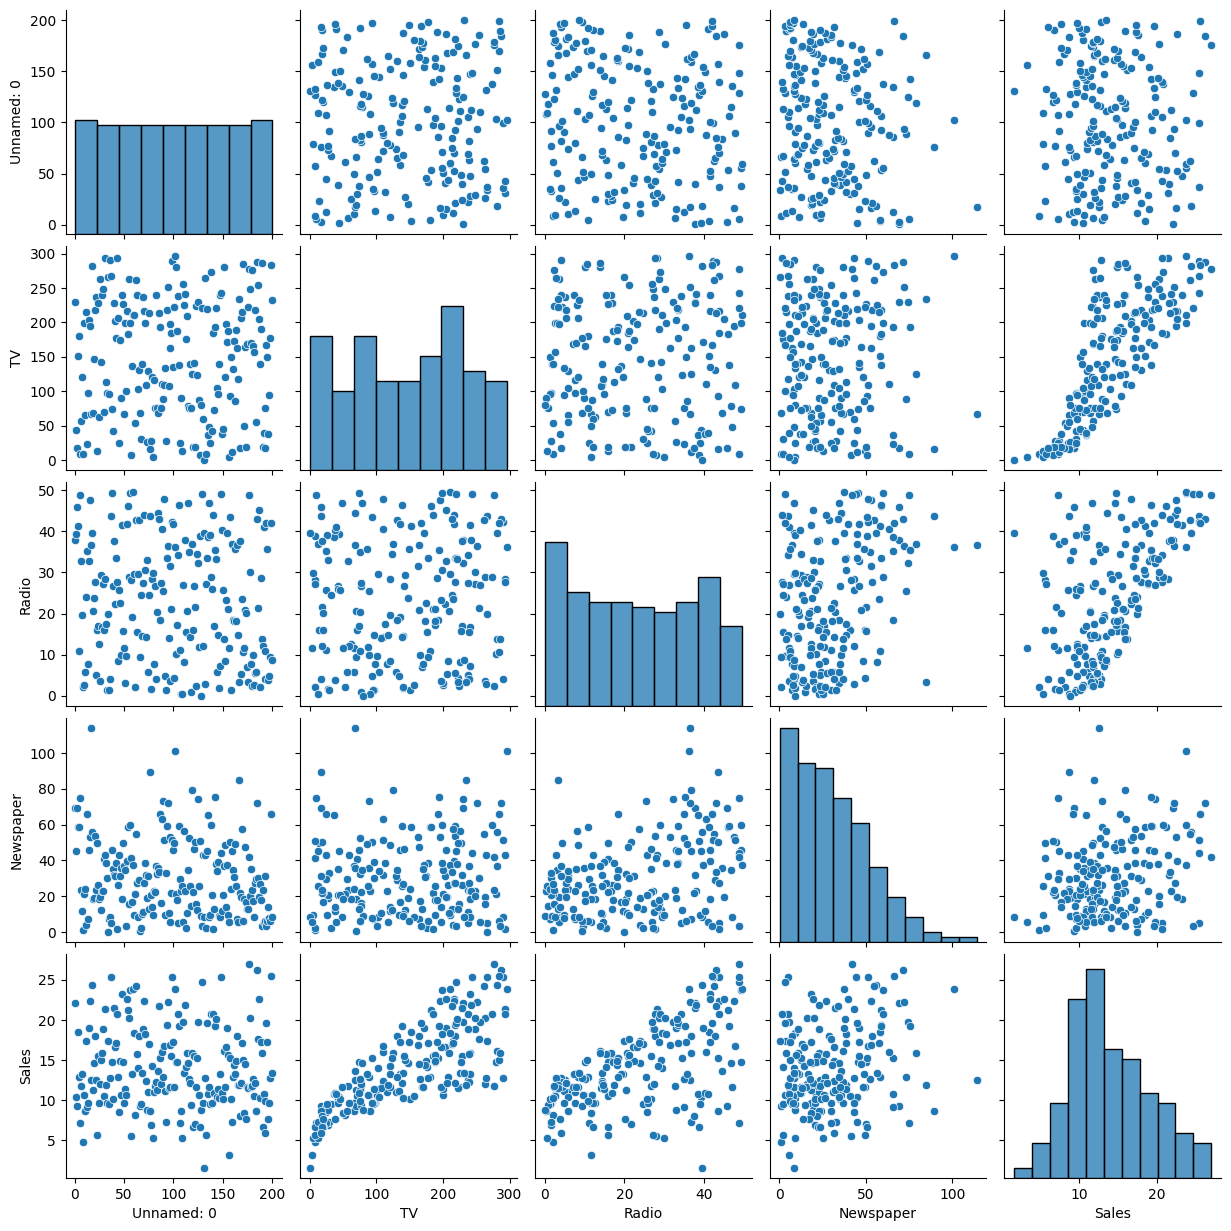

In [19]:
# prompt: make pairplot

import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()


In [21]:
# prompt: select features from the data set

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


In [22]:
# prompt: apply train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# prompt: print shape of train-tst

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(160, 3)
(40, 3)
(160,)
(40,)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


Mean Squared Error: 3.1740973539761033
Root Mean Squared Error: 1.78159966153345
Mean Absolute Error: 1.4607567168117603
R-squared: 0.899438024100912


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the scores
mean_mse = -scores.mean()
std_mse = scores.std()

print('Mean Squared Error (Cross-Validation):', mean_mse)
print('Standard Deviation of MSE:', std_mse)

# You can also calculate other metrics like R-squared
scores_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
mean_r2 = scores_r2.mean()
std_r2 = scores_r2.std()

print('R-squared (Cross-Validation):', mean_r2)
print('Standard Deviation of R-squared:', std_r2)


Mean Squared Error (Cross-Validation): 0.6492077999999981
Standard Deviation of MSE: 0.2630823886158197
R-squared (Cross-Validation): 0.9755155497962253
Standard Deviation of R-squared: 0.009473987508501112
